In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score


data = pd.read_csv('/content/Task 3 and 4_Loan_Data.csv')


X = data.drop(columns=['customer_id', 'default'])
y = data['default']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

print(" Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("MSE:", mean_squared_error(y_test, y_pred_prob))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_prob)))
print("MAE:", mean_absolute_error(y_test, y_pred_prob))
print("R² Score:", r2_score(y_test, y_pred_prob))


def predict_expected_loss_from_input():
    print("\n Enter borrower details:")
    credit_lines_outstanding = float(input("Credit Lines Outstanding: "))
    loan_amt_outstanding = float(input("Loan Amount Outstanding: "))
    total_debt_outstanding = float(input("Total Debt Outstanding: "))
    income = float(input("Annual Income: "))
    years_employed = float(input("Years Employed: "))
    fico_score = float(input("FICO Score: "))

    input_data = pd.DataFrame([[
        credit_lines_outstanding,
        loan_amt_outstanding,
        total_debt_outstanding,
        income,
        years_employed,
        fico_score
    ]], columns=X.columns)

    pd_value = model.predict_proba(input_data)[0][1]
    recovery_rate = 0.10
    expected_loss = pd_value * (1 - recovery_rate)

    print(f"\n Probability of Default (PD): {pd_value:.4f}")
    print(f" Expected Loss (EL): {expected_loss:.4f}")


predict_expected_loss_from_input()


 Model Evaluation:
Accuracy: 0.997
AUC Score: 0.9999913027747628
MSE: 0.002490946821905557
RMSE: 0.049909386110285475
MAE: 0.0074543212555413544
R² Score: 0.9826685395486797

 Enter borrower details:
Credit Lines Outstanding: 5147.245789
Loan Amount Outstanding: 1457.32547
Total Debt Outstanding: 4785.36584
Annual Income: 7845.14725
Years Employed: 6
FICO Score: 784

 Probability of Default (PD): 1.0000
 Expected Loss (EL): 0.9000


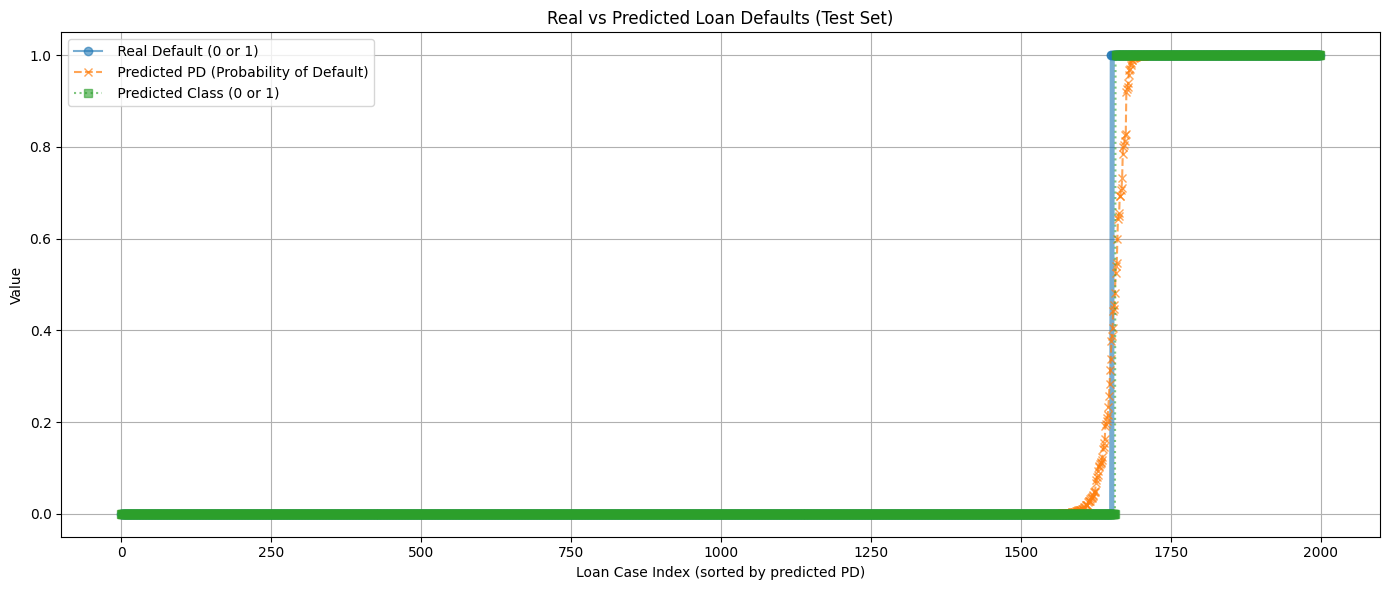

In [7]:
import matplotlib.pyplot as plt


sorted_idx = np.argsort(y_pred_prob)
y_test_sorted = y_test.values[sorted_idx]
y_pred_prob_sorted = y_pred_prob[sorted_idx]
y_pred_class_sorted = (y_pred_prob_sorted >= 0.5).astype(int)


plt.figure(figsize=(14, 6))
plt.plot(y_test_sorted, label=' Real Default (0 or 1)', linestyle='-', marker='o', alpha=0.6)
plt.plot(y_pred_prob_sorted, label=' Predicted PD (Probability of Default)', linestyle='--', marker='x', alpha=0.7)
plt.plot(y_pred_class_sorted, label=' Predicted Class (0 or 1)', linestyle=':', marker='s', alpha=0.6)

plt.title('Real vs Predicted Loan Defaults (Test Set)')
plt.xlabel('Loan Case Index (sorted by predicted PD)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


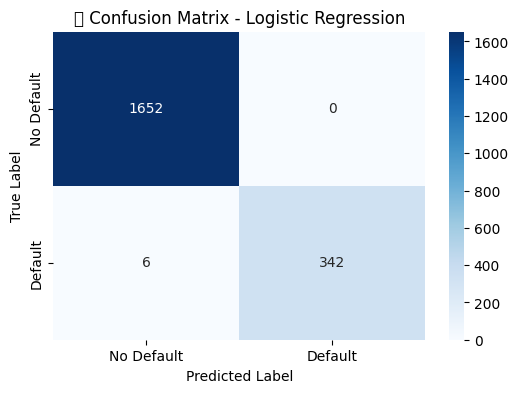

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predicted classes from probability threshold
y_pred_class = (y_pred_prob >= 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
labels = ['No Default', 'Default']

# Plot using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('📊 Confusion Matrix - Logistic Regression')
plt.show()
